<a href="https://www.kaggle.com/code/kouroshemami/eda-on-imdb-top-movies?scriptVersionId=145479935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#c04df9	;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: .01px; color:white;"> 
    <center><span style="color: #f3ea5f	; font-family: cursive; font-size: 36px;" >
    Exploratory Data Analysis on IMDB 1000 Top Movies
    </span><ceenter/> 
</p>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


***

# <center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >1. Delve deeper into the dataset 📚</span><center/>

<span style="font-size:20px;"> I plan to work with the IMDB Movies Dataset and perform Exploratory Data Analysis (EDA) on it. Initially, I aim to delve deeper into the dataset to thoroughly understand the meaning of each individual column. </span>

<span style="font-size:20px;"> In the "Content" section of the dataset, I read the following informatiom 🎞:</span>
<span style="font-size:20px;"> 
* `Poster_Link` : This is the link to the poster used by IMDb.
* `Series_Title` : This represents the name of the movie.
* `Released_Year` : This indicates the year in which the movie was released.
* `Certificate` : This refers to the certification earned by the movie.
* `Runtime` : It signifies the total duration of the movie.
* `Genre` : This specifies the genre of the movie.
* `IMDB_Rating` : This is the rating given to the movie on the IMDb site.
* `Overview` : This provides a brief summary or story.
* `Meta_score` : This is the score awarded to the movie.
* `Director` : This is the name of the director.
* `Star1`, `Star2`, `Star3`, `Star4` : These are the names of the stars in the movie.
* `No_of_votes` : This represents the total number of votes received.
* `Gross` : This indicates the earnings of the movie. 
</span>

<span style="font-size:20px;"> However, I found that I had some confusion about certain descriptions. To clarify, I conducted searches and discovered explanations for these terms on the **IMDb website🍿:**

* `Certificate` : This feature provides additional information to parents and movie viewers, as different parents and guardians have varying beliefs about what is suitable for their children. The severity ratings in the parental guide are averaged across all votes. I believe that the provider of this dataset includes certificates from India.
* `Meta_Score` : Metascore is considered the rating of a film. Scores are assigned to movie's reviews of large group of the world's most respected critics, and weighted average are applied to summarize their opinions range.The result is shown in single number that captures the essence of critical opinion in one Metascore. Movies will get a Metascore only if at least four critics's reviews are collected.The higher the Metascore, the more positive reviews a movie has.  </span>

***

# <center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >2. Data Cleaning 🧹</span></center>

<span style="font-size:20px;"> To assess our data quality, let's examine our dataset: </span>

In [2]:
imdb = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


> <span style="font-size:20px;">🙌 Check for the presence of any <span style="color:crimson;"> **duplicated values**</span> : </span>

In [4]:
imdb.duplicated().sum()

0

<span style="font-size:20px;"> Fortunately, there are no duplicated values. </span>

> <span style="font-size:20px;">🥧 Let's identify any <span style="color:crimson;"> **missing values** </span> in the dataset: </span>

<Axes: >

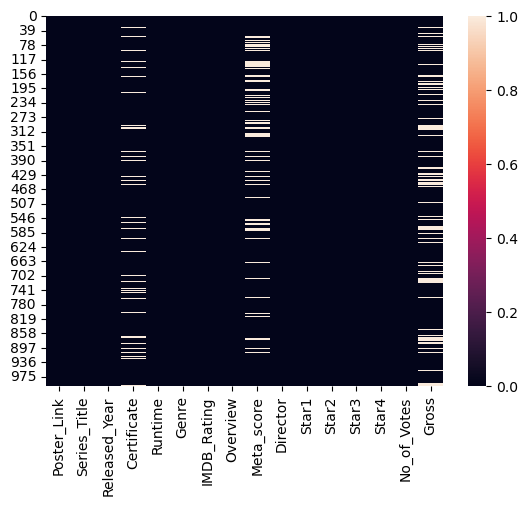

In [5]:
sns.heatmap(imdb.isnull())

In [6]:
imdb.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

<span style="font-size:20px;"> It appears that there are missing values in three columns. Let's determine the percentage of missing data.In order to this approach, I've written a Python function: </span>

In [7]:
def print_columns_with_missing_values_percentage(dataframe):
    total_rows = dataframe.shape[0]
    for column_name in dataframe.columns:
        missing_count = dataframe[column_name].isnull().sum()
        if missing_count > 0:
            missing_percentage = (missing_count / total_rows) * 100
            print(f'% of missing values in column "{column_name}" is {missing_percentage:.2f}')
print_columns_with_missing_values_percentage(imdb)

% of missing values in column "Certificate" is 10.10
% of missing values in column "Meta_score" is 15.70
% of missing values in column "Gross" is 16.90


In [8]:
imdb.Certificate.describe()

count     899
unique     16
top         U
freq      234
Name: Certificate, dtype: object

> <span style="font-size:20px;"> So, I will replace missing values in the "Certificate" column with "U" because it is the most frequently occurring value in that column: </span>

In [9]:
imdb.Certificate.fillna('U',inplace=True)

<span style="font-size:20px;"> Subsequently, I will replace the missing values in the "Meta_score" column with the mean value of that column: </span>

In [10]:
imdb.Meta_score.fillna(imdb.Meta_score.mean(), inplace=True)

<div class="alert alert-block alert-info" style="font-size:20px;"> 📌 The "Gross" column is currently of type "object", so it needs to be converted to an float type in order to calculate its mean ( Converting the "Gross" column to an integer type is not feasible because the column contains null values, which cannot be converted to integers):</div>

In [11]:
imdb.Gross = imdb.Gross.str.replace(',','').astype(float)

In [12]:
imdb.Gross = imdb.Gross.fillna(imdb.Gross.mean())

<span style="font-size:20px;"> Now, I will check the data to identify any remaining missing values: <span>

In [13]:
imdb.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

<span style="font-size:20px;">🧼 I will remove **<span style="color:crimson;"> columns that are not relevant </span>** for my analysis: </span>

In [14]:
imdb.drop('Poster_Link', inplace= True, axis=1)

<span style="font-size:20px;">🧽 I will verify the **<span style="color:crimson;"> data types </span>** of the columns for validation: </span>

In [15]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 117.3+ KB


<span style="font-size:20px;">🔢 It appears that the `Runtime` and `Released_Year` columns should be converted to integers: <span>

In [16]:
imdb.Released_Year.value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [17]:
imdb[imdb.Released_Year == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


<span style="font-size:20px;"> It was only one data ("PG") which was non-numerical. So, i search the internet for the movie "Apollo 13" and find that its realeased year was 1995. Then I replace this value in the dataset: <span>

In [18]:
imdb.Released_Year.replace('PG', 1995, inplace=True)

In [19]:
imdb[imdb.Series_Title == 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [20]:
imdb.Released_Year = imdb.Released_Year.astype(int)

In [21]:
imdb.Runtime = imdb.Runtime.map(lambda x: x.split(' ')[0]).astype(int)

In [22]:
imdb.Runtime

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64

<span style="font-size:20px;">☕ To ensure the correct formats: <span>

In [23]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.3+ KB


***

# <center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >3. Visualization 📊</span></center>

<span style="font-size:20px;"> Alright, our data is now clean and ready for visualization. Let's start by creating visualizations to answer some questions about the dataset. <span>

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" > 3.1. Direcotors 🎥</span></center>

<span style="font-size:20px;"> For start I will analyze the directors. Which director's movies have the highest average rating? 🎬<span>

In [24]:
highest_rating_directors = imdb.groupby(imdb.Director).IMDB_Rating.mean().sort_values(ascending=False)
highest_rating_directors.head(10)

Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
George Lucas          8.60
Roberto Benigni       8.60
Masaki Kobayashi      8.60
Thomas Kail           8.60
Sudha Kongara         8.60
Fernando Meirelles    8.60
Roger Allers          8.50
Name: IMDB_Rating, dtype: float64

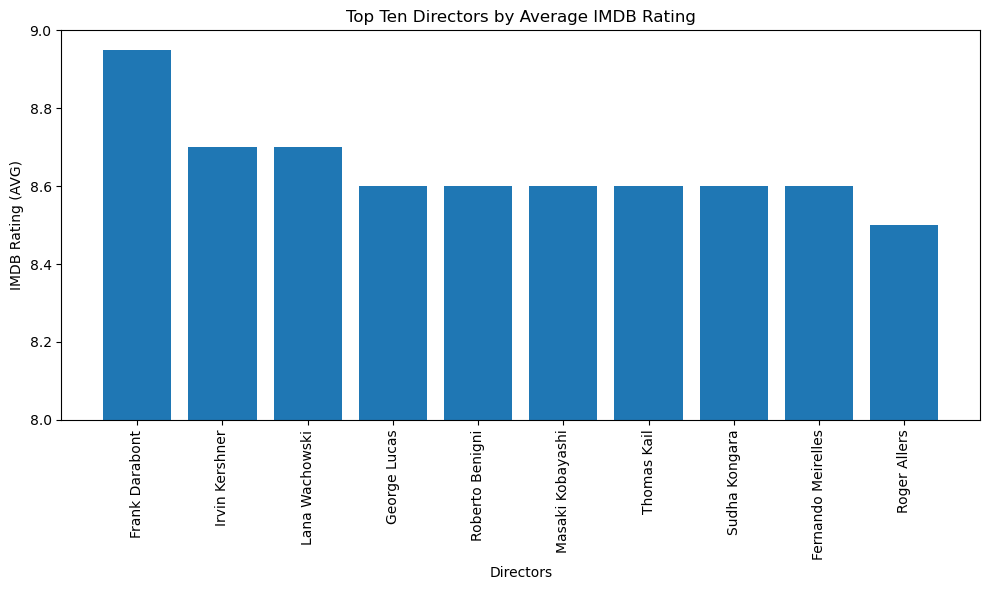

In [25]:
top_ten_highest_rating_directors = highest_rating_directors.head(10)
plt.figure(figsize=(10,6))
plot = plt.bar(top_ten_highest_rating_directors.index, top_ten_highest_rating_directors.values)
# To restrict the x-axis to make the rating differences more noticeable
plt.ylim(round(top_ten_highest_rating_directors.values.min()), round(top_ten_highest_rating_directors.values.max()))
plt.xticks(rotation=90)
plt.ylabel("IMDB Rating (AVG)")
plt.xlabel("Directors")
plt.title("Top Ten Directors by Average IMDB Rating")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;"> Let's apply the same approach to the Meta Score this time 💯: <span>

In [26]:
highest_metascore_directors = imdb.groupby(imdb.Director).Meta_score.mean().sort_values(ascending=False)
highest_metascore_directors.head(10)

Director
Orson Welles            99.5
Charles Laughton        99.0
Michael Curtiz          98.5
Guillermo del Toro      98.0
Carol Reed              97.0
Sergei M. Eisenstein    97.0
Sam Peckinpah           97.0
Jules Dassin            97.0
Cristian Mungiu         97.0
Richard Lester          96.0
Name: Meta_score, dtype: float64

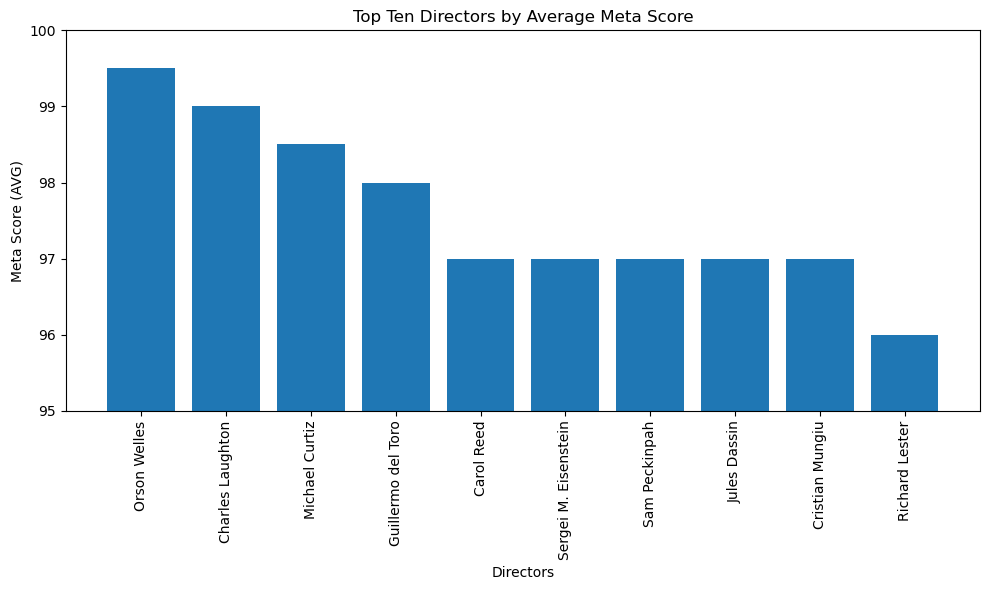

In [27]:
top_ten_highest_metascore_directors = highest_metascore_directors.head(10)
plt.figure(figsize=(10,6))
plot = plt.bar(top_ten_highest_metascore_directors.index, top_ten_highest_metascore_directors.values)
# To restrict the x-axis to make the Score differences more noticeable:
plt.ylim(round(top_ten_highest_metascore_directors.values.min()-1), round(top_ten_highest_metascore_directors.values.max())) # To restrict the x-axis to make the rating differences more noticeable.
plt.xticks(rotation=90)
plt.ylabel("Meta Score (AVG)")
plt.xlabel("Directors")
plt.title("Top Ten Directors by Average Meta Score")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;">💰💸💲 Top directors whose movies have generated the highest gross earnings: <span>

In [28]:
highest_gross_directors = imdb.groupby(imdb.Director).Gross.sum().sort_values(ascending=False)
highest_gross_directors.head(10)

Director
Steven Spielberg     2.478133e+09
Anthony Russo        2.205039e+09
Christopher Nolan    1.937454e+09
James Cameron        1.748237e+09
Peter Jackson        1.597312e+09
J.J. Abrams          1.423171e+09
Brad Bird            1.099628e+09
Robert Zemeckis      1.049446e+09
Pete Docter          1.007417e+09
David Yates          9.789537e+08
Name: Gross, dtype: float64

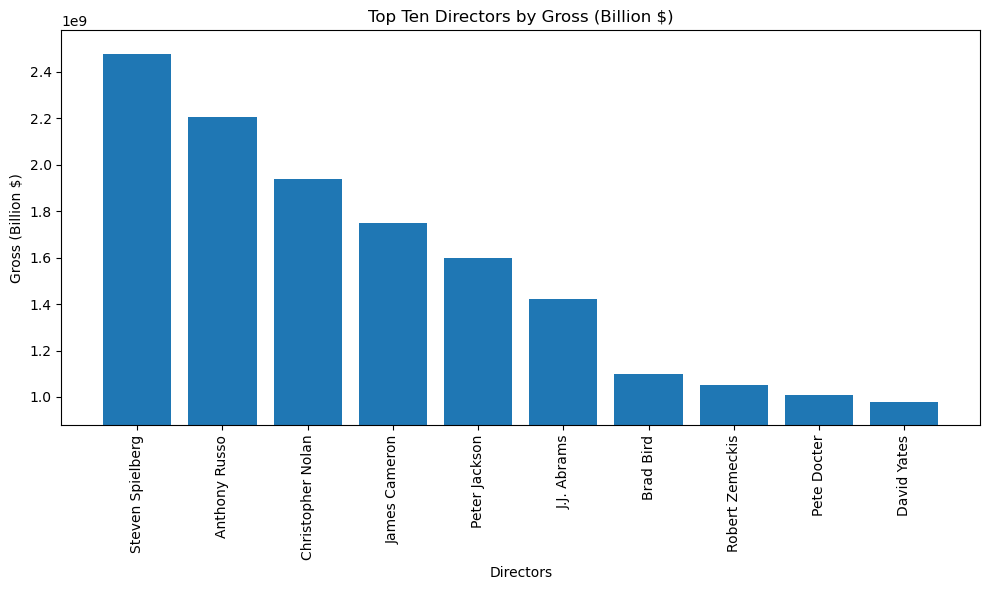

In [29]:
top_ten_highest_gross_directors = highest_gross_directors.head(10)
plt.figure(figsize=(10,6))
plot = plt.bar(top_ten_highest_gross_directors.index, top_ten_highest_gross_directors.values)
# To restrict the x-axis to make the Gross differences more noticeable:
plt.ylim(round(top_ten_highest_gross_directors.values.min()-100000000), round(top_ten_highest_gross_directors.values.max()+100000000)) # To restrict the x-axis to make the rating differences more noticeable.
plt.xticks(rotation=90)
plt.ylabel("Gross (Billion $)")
plt.xlabel("Directors")
plt.title("Top Ten Directors by Gross (Billion $)")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;"> 📽🎥 Top directors that created most movies: <span>

In [30]:
director_movie_count = imdb['Director'].value_counts()
director_movie_count

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

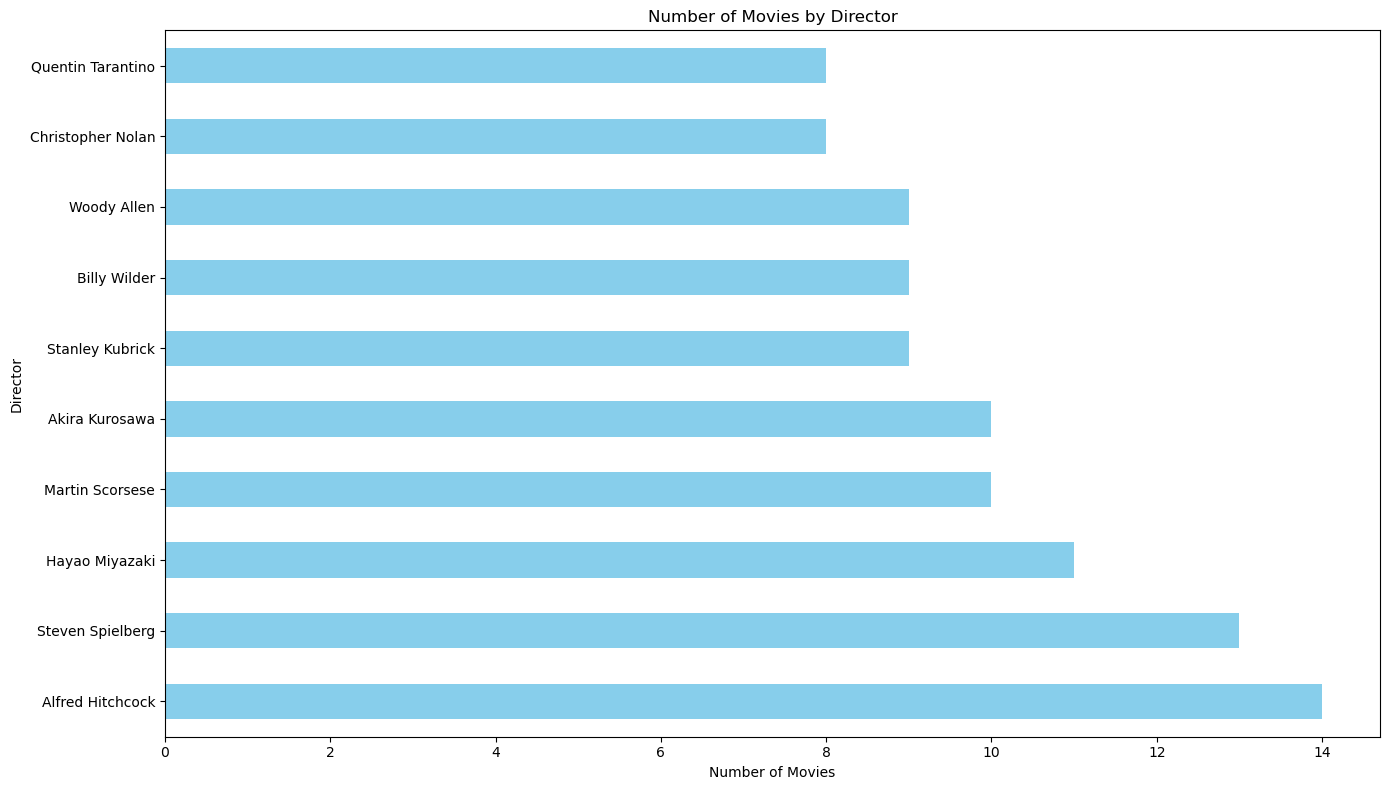

In [31]:
plt.figure(figsize=(14,8))
director_movie_count.sort_values(ascending=False)[:10].plot(kind='barh', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Number of Movies by Director')
plt.tight_layout()

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >3.2. Correlations 📉</span></center>

<span style="font-size:20px;"> ⚖ Lets find the correlation between `Gross` and `IMDB Rating` or `Meta Score` : <span>

<Figure size 1400x800 with 0 Axes>

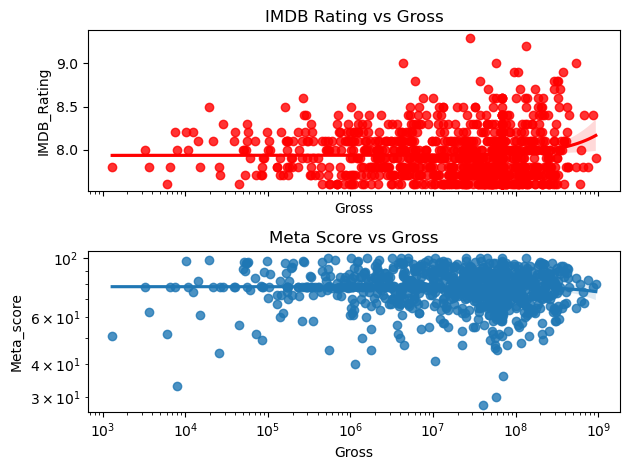

In [32]:
plt.figure(figsize=(14,8))
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
sns.regplot(x='Gross', y='IMDB_Rating', data=imdb, ax=ax1, color='red')
sns.regplot(x='Gross', y='Meta_score', data=imdb, ax=ax2)
ax1.set_title('IMDB Rating vs Gross')
plt.xscale('log')
plt.yscale('log')
ax2.set_title('Meta Score vs Gross')
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;"> There doesn't appear to be a significant correlation between ratings or scores and the gross amount.🙈 <span>

<span style="font-size:20px;">📉 Is there any correlation between `Runtime` and `IMDB Rating` or `Meta Score`? <span>

<Figure size 1400x800 with 0 Axes>

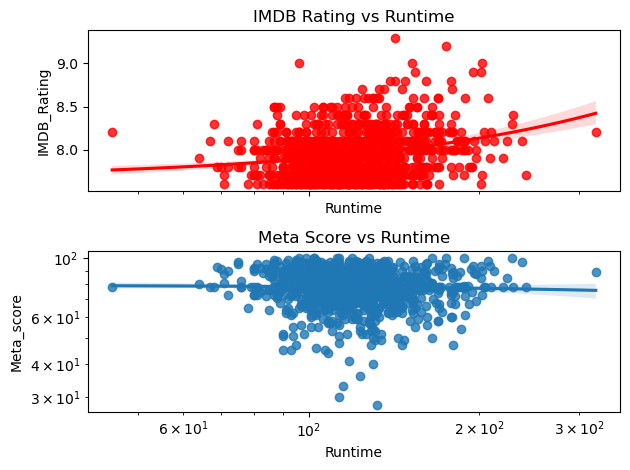

In [33]:
plt.figure(figsize=(14,8))
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
sns.regplot(x='Runtime', y='IMDB_Rating', data=imdb, ax=ax1, color='red')
sns.regplot(x='Runtime', y='Meta_score', data=imdb, ax=ax2)
ax1.set_title('IMDB Rating vs Runtime')
plt.xscale('log')
plt.yscale('log')
ax2.set_title('Meta Score vs Runtime')
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;"> 💹 There is a positive correlation between `IMDB Rating` and `Runtime`. <span>

<span style="font-size:20px;"> Is there any correlation between `Runtime` and `Gross` amount? <span>

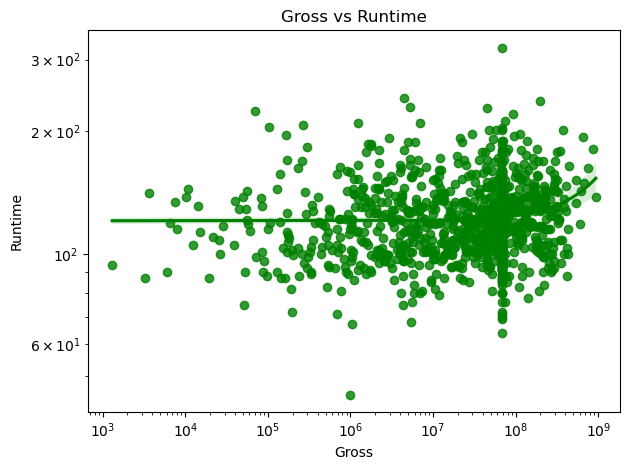

In [34]:
sns.regplot(x='Gross', y='Runtime', data=imdb, color='Green')
plt.title('Gross vs Runtime')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()  # Adjust layout for better label visibility

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >3.3. Histograms (Distributions frequency) 📊</span></center>

<span style="font-size:20px;">🍿 Distribution frequency of `IMDB Rating`: <span>

In [35]:
bins= []
for x in np.arange(int(imdb.IMDB_Rating.min()) , int(imdb.IMDB_Rating.max()+1), 0.25):
    bins.append(x)

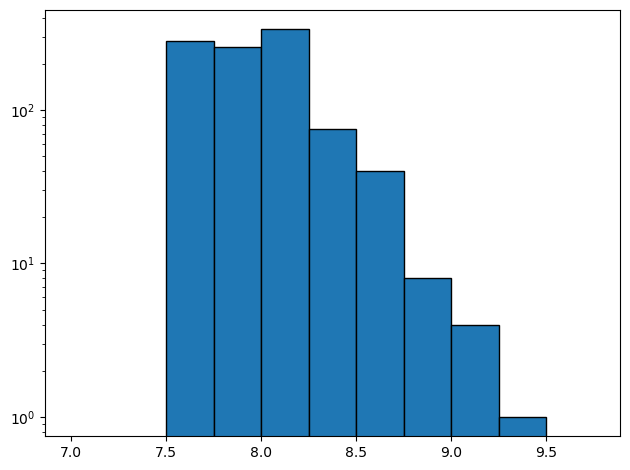

In [36]:

plt.hist(imdb.IMDB_Rating, edgecolor='Black', bins= bins,log=True)
plt.tight_layout()  # Adjust layout for better label visibility

<span style="font-size:20px;">💯 Distribution frequency of `Meta Score`: <span>

In [37]:
bins= []
for x in np.arange(int(imdb.Meta_score.min()) , int(imdb.Meta_score.max()), 10):
    bins.append(x)

<Axes: xlabel='Meta_score', ylabel='Count'>

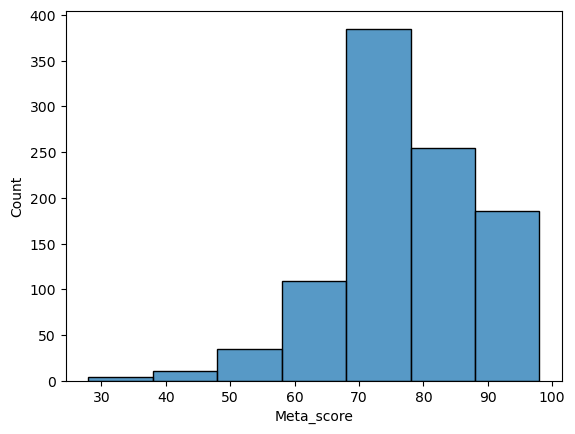

In [38]:
sns.histplot(imdb.Meta_score, bins=bins)

<span style="font-size:20px;">⌚ Distribution frequency of `Runtime`: <span>

In [39]:
bins= []
for x in np.arange(int(imdb.Runtime.min()) , int(imdb.Runtime.max()), 25):
    bins.append(x)

<Axes: xlabel='Runtime', ylabel='Count'>

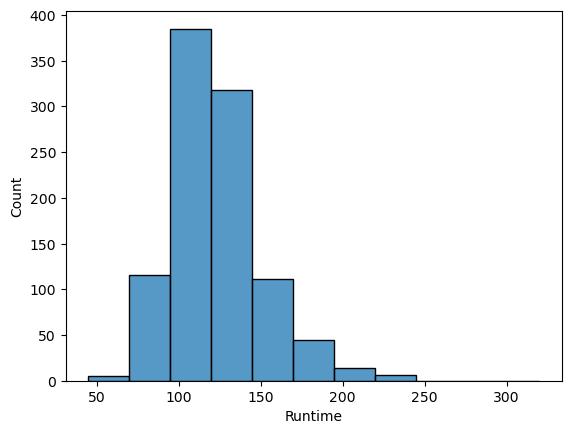

In [40]:
sns.histplot(imdb.Runtime, bins=bins)

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >3.4. Top Genres 🎦</span></center>

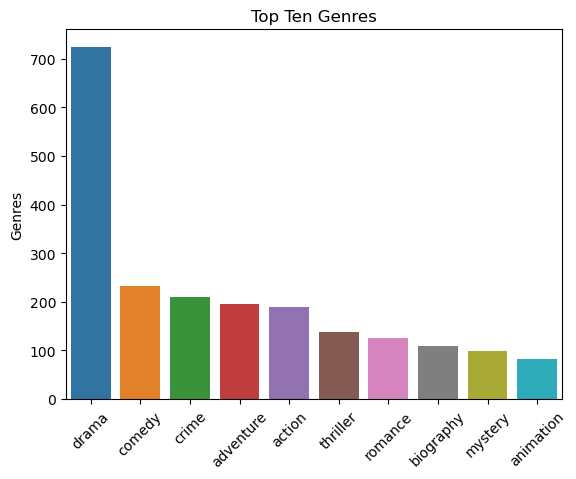

In [41]:
from collections import Counter
genre=[]
for x in imdb['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

sns.barplot(y=y,x=x)
plt.ylabel("Genres")
plt.title("Top Ten Genres")
plt.xticks(rotation=45)
plt.show()

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >3.5. The analysis with focus on the release years 📅</span></center>

<span style="font-size:20px;">**Next, I'll conduct an analysis focused on the release years of the movies:** <span>

<span style="font-size:20px;"> To begin, I want to determine the years with the highest average `IMDb Ratings`, essentially finding the top years with the best ratings on average: <span>

In [42]:
highest_imdb_rating_years = imdb.groupby(imdb.Released_Year).IMDB_Rating.mean().sort_values(ascending=False)
highest_imdb_rating_years.head(10)

Released_Year
1936    8.500000
1921    8.300000
1957    8.277778
1994    8.238462
1942    8.233333
1931    8.200000
1924    8.200000
1927    8.200000
1954    8.166667
1941    8.150000
Name: IMDB_Rating, dtype: float64

<span style="font-size:20px;">Similarly, I'll conduct a similar analysis for the `Meta Score`: <span>

In [43]:
highest_meta_score_years = imdb.groupby(imdb.Released_Year).Meta_score.mean().sort_values(ascending=False)
highest_meta_score_years.head(10)

Released_Year
1941    98.000000
1936    96.000000
1938    95.333333
1943    94.000000
1930    91.000000
1977    90.666667
1958    90.242883
1933    90.000000
1959    89.991866
1940    89.420437
Name: Meta_score, dtype: float64

<div class="alert alert-block alert-info" style="font-size:20px;"> 📌   Very Important!    : I've noticed an issue in the results. The presence of very early years might not be accurate since they predominantly involve classic black and white movies, which only true enthusiasts would have watched and rated highly. To address this, I've filtered out years prior to 1980 and will repeat the same analysis:</div>

In [44]:
filtered_years = imdb[imdb.Released_Year > 1980]
highest_imdb_rating_years = filtered_years.groupby(filtered_years.Released_Year).IMDB_Rating.mean().sort_values(ascending=False)
highest_imdb_rating_years.head(10)

Released_Year
1994    8.238462
2020    8.133333
1988    8.036364
1999    8.017647
1983    8.000000
1984    8.000000
2019    7.995652
2018    7.994737
1995    7.990000
1981    7.975000
Name: IMDB_Rating, dtype: float64

In [45]:
highest_meta_score_years = filtered_years.groupby(imdb.Released_Year).Meta_score.mean().sort_values(ascending=False)
highest_meta_score_years.head(10)

Released_Year
1984    81.663503
2020    81.157177
1994    80.690118
1985    79.552392
1989    79.545455
2007    79.381330
2015    79.314306
2017    79.268845
1981    79.000000
2016    78.671454
Name: Meta_score, dtype: float64

<span style="font-size:20px;">💰  Next, I intend to identify the top years that have generated the highest gross earnings: <span>

In [46]:
highest_gross_years = imdb.groupby(imdb.Released_Year).Gross.mean().sort_values(ascending=False)
highest_gross_years.head(10)

Released_Year
1977    1.646763e+08
2018    1.551543e+08
2019    1.253472e+08
2012    1.144467e+08
2010    1.112285e+08
2009    1.106658e+08
2016    1.048475e+08
2015    1.039363e+08
2008    1.000117e+08
2017    9.988102e+07
Name: Gross, dtype: float64

<span style="font-size:20px;">⌛ What is the average for Runtime? <span>

In [47]:
imdb.Runtime.mean()

122.891

<span style="font-size:20px;">⏳ Which years have the longest average movie durations? <span>

In [48]:
longest_runtime_on_average_years = imdb.groupby(imdb.Released_Year).Runtime.mean().sort_values(ascending=False)
longest_runtime_on_average_years.head(10)

Released_Year
1930    152.000000
1965    151.500000
1970    143.000000
1956    140.800000
1996    137.200000
1959    137.142857
1963    137.000000
2012    135.666667
1939    135.000000
1966    133.428571
Name: Runtime, dtype: float64

<span style="font-size:20px;"> 📈 Now, I'll proceed to visualize these findings on plots: <span>

<span style="font-size:20px;"> 👔 To discover and use a more suitable visual style: <span>

In [49]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<span style="font-size:20px;">🔝 Top Ten Years by Average `IMDb Ratings`: <span>

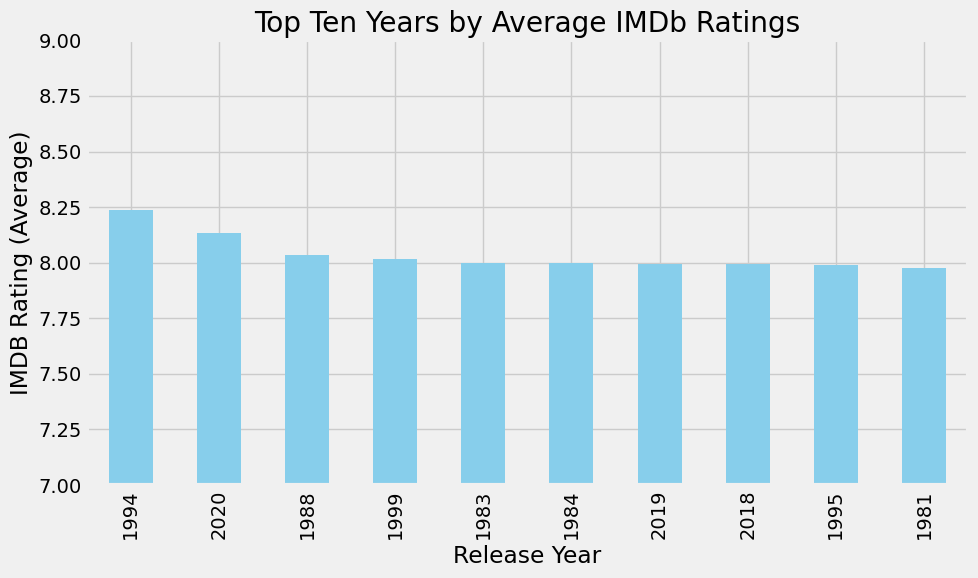

In [50]:
plt.style.use('fivethirtyeight')
top_ten_highest_imdb_rating_years = highest_imdb_rating_years.head(10)
plt.figure(figsize=(10,6))
ax = top_ten_highest_imdb_rating_years.plot(kind='bar', color='skyblue')
# To restrict the x-axis to make the Gross differences more noticeable:
plt.ylim(round(top_ten_highest_imdb_rating_years.values.min()-0.5), round(top_ten_highest_imdb_rating_years.values.max()+0.5))
ax.set_xticks(range(len(top_ten_highest_imdb_rating_years)))
ax.set_xticklabels(top_ten_highest_imdb_rating_years.index)
plt.ylabel("IMDB Rating (Average)")
plt.xlabel("Release Year")
plt.title("Top Ten Years by Average IMDb Ratings")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;">🔝 Top Ten Years by Average `Meta Score`: <span>

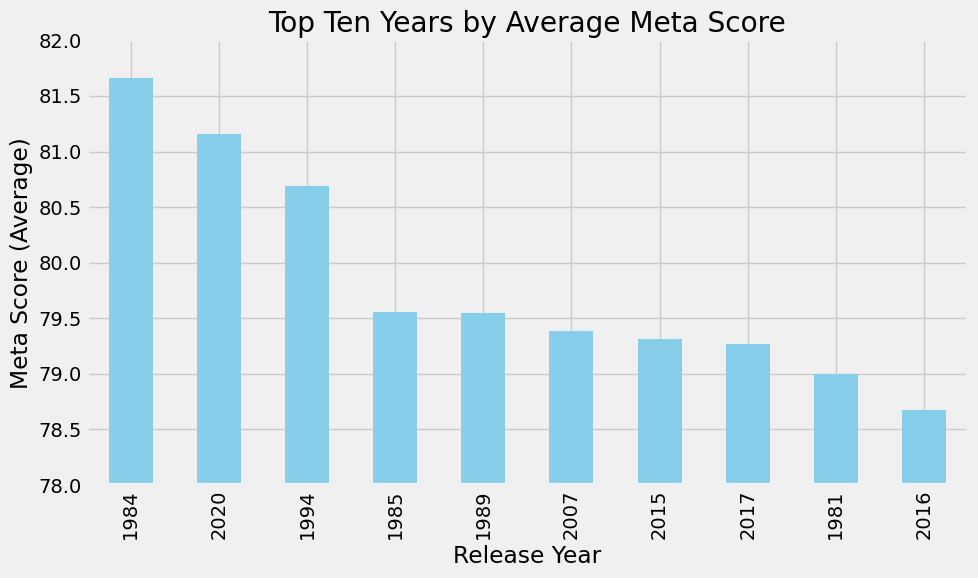

In [51]:
plt.style.use('fivethirtyeight')
top_ten_highest_meta_score_years = highest_meta_score_years.head(10)
plt.figure(figsize=(10,6))
ax = top_ten_highest_meta_score_years.plot(kind='bar', color='skyblue')
# To restrict the x-axis to make the Gross differences more noticeable:
plt.ylim(round(top_ten_highest_meta_score_years.values.min()-0.5), round(top_ten_highest_meta_score_years.values.max()+0.5))
ax.set_xticks(range(len(top_ten_highest_meta_score_years)))
ax.set_xticklabels(top_ten_highest_meta_score_years.index)
plt.ylabel("Meta Score (Average)")
plt.xlabel("Release Year")
plt.title("Top Ten Years by Average Meta Score")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;">🔝 Top Ten Years by Average `Gross`: <span>

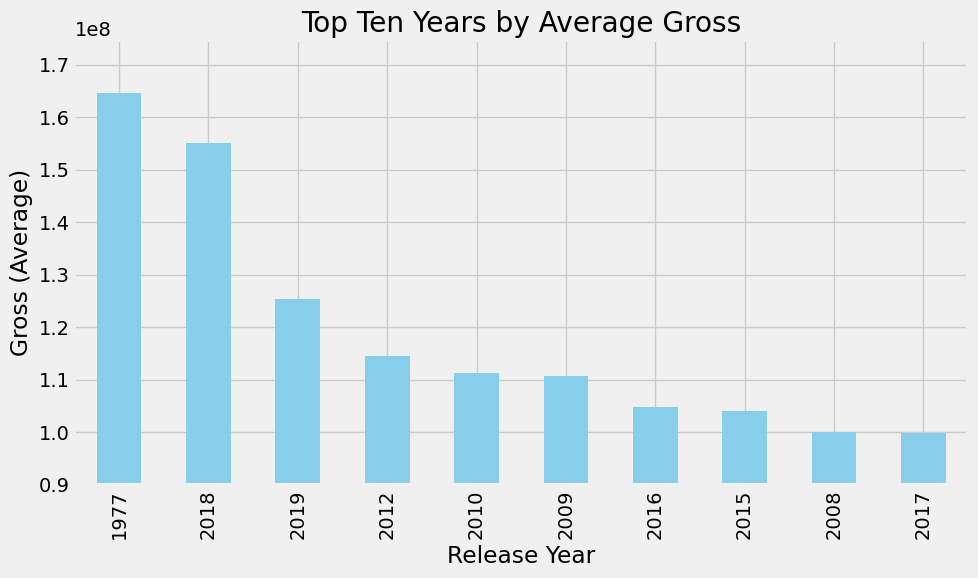

In [52]:
plt.style.use('fivethirtyeight')
top_ten_highest_gross_years = highest_gross_years.head(10)
plt.figure(figsize=(10,6))
ax = top_ten_highest_gross_years.plot(kind='bar', color='skyblue')
# To restrict the x-axis to make the Gross differences more noticeable:
plt.ylim(round(top_ten_highest_gross_years.values.min()-10000000), round(top_ten_highest_gross_years.values.max()+10000000))
ax.set_xticks(range(len(top_ten_highest_gross_years)))
ax.set_xticklabels(top_ten_highest_gross_years.index)
plt.ylabel("Gross (Average)")
plt.xlabel("Release Year")
plt.title("Top Ten Years by Average Gross")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;">🔝 Top Ten Years by Average `Runtime`: <span>

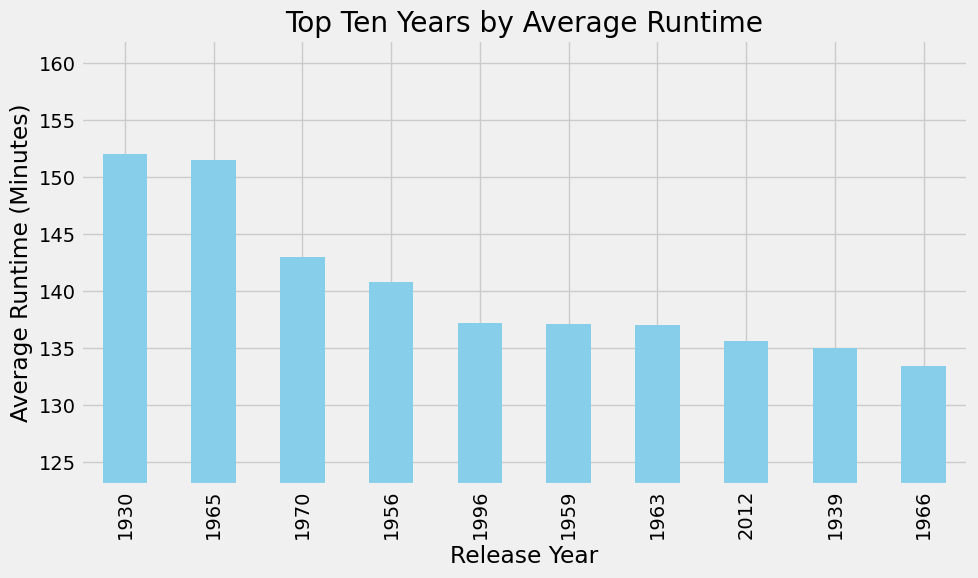

In [53]:
plt.style.use('fivethirtyeight')
top_ten_longest_runtime_on_average_years = longest_runtime_on_average_years.head(10)
plt.figure(figsize=(10,6))
ax = top_ten_longest_runtime_on_average_years.plot(kind='bar', color='skyblue')
# To restrict the x-axis to make the Gross differences more noticeable:
plt.ylim(round(top_ten_longest_runtime_on_average_years.values.min()-10), round(top_ten_longest_runtime_on_average_years.values.max()+10))
ax.set_xticks(range(len(top_ten_longest_runtime_on_average_years)))
ax.set_xticklabels(top_ten_longest_runtime_on_average_years.index)
plt.ylabel("Average Runtime (Minutes)")
plt.xlabel("Release Year")
plt.title("Top Ten Years by Average Runtime")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

<span style="font-size:20px;"> 📅 `Released Year` distribution: <span>

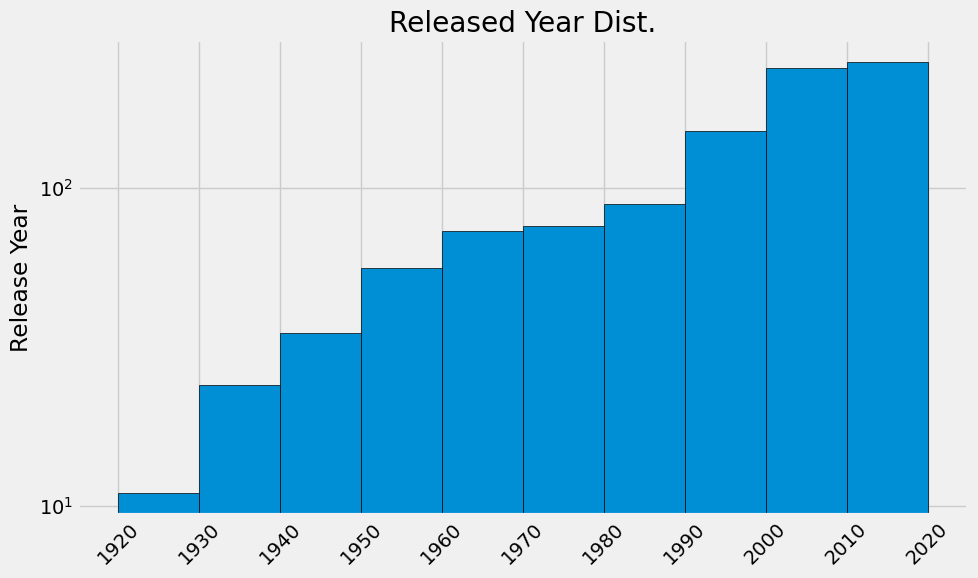

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plot = plt.hist(imdb.Released_Year,log=True, edgecolor='Black', bins=10)

# Customize x-axis ticks
min_year = imdb.Released_Year.min()
max_year = imdb.Released_Year.max()
years_range = max_year - min_year

# Show only a subset of the years on the x-axis
num_ticks = 10  # Number of ticks you want to show
tick_step = years_range // num_ticks
tick_positions = range(min_year, max_year + 1, tick_step)
plt.xticks(tick_positions, rotation=45)

plt.ylabel("Release Year")
plt.title("Released Year Dist.")
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >3.6. The analysis with focus on movie stars 🌟</span></center>

<span style="font-size:20px;">**Now, it's time to calculate some indicators related to the stars ⭐:** <span>



<span style="font-size:20px;">To determine which star has a greater impact on `IMDb rating`, `Meta score` (on average), or has generated higher gross amounts, I need to perform some preparations for analysis.
To implement this approach, I intend to create a list containing stars and 5 additional columns (`IMDB_Rating`, `Meta_score`, `Genre`, `Gross`, `No_of_Votes`): <span>


In [55]:
# stars = ['Star1', 'Star2', 'Star3', 'Star4']
# dfs_list = []
# for item in stars:
#     df = imdb[[item,'Genre','IMDB_Rating','Meta_score','Gross','No_of_Votes']]
#     df.rename(columns={item: 'star'}, inplace=True)
#     dfs_list.append(df)
# total = pd.concat(dfs_list, ignore_index=True)
# total.shape

<span style="font-size:20px;">**Or, we can unpivot our table with <span style="color:red">melt():</span>** </span>

In [56]:
# Unpivot the stars columns
total = pd.melt(
    imdb,
    id_vars=['Series_Title', 'Released_Year', 'Runtime', 'Genre',
             'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', 'Gross'],
    value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
    value_name='star',
    var_name='Star_Number'
)

# Drop the 'Star_Number' column and reset index
total.drop('Star_Number', axis=1, inplace=True)
total.reset_index(drop=True, inplace=True)
total.sort_values(by='Series_Title').head(20)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,star
1754,(500) Days of Summer,2009,95,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,472242,32391374.0,Joseph Gordon-Levitt
3754,(500) Days of Summer,2009,95,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,472242,32391374.0,Chloë Grace Moretz
754,(500) Days of Summer,2009,95,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,472242,32391374.0,Zooey Deschanel
2754,(500) Days of Summer,2009,95,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,472242,32391374.0,Geoffrey Arend
4,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,Henry Fonda
2004,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,Martin Balsam
3004,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,John Fiedler
1004,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,Lee J. Cobb
3215,12 Years a Slave,2013,134,"Biography, Drama, History",8.1,96.0,Steve McQueen,640533,56671993.0,Brad Pitt
2215,12 Years a Slave,2013,134,"Biography, Drama, History",8.1,96.0,Steve McQueen,640533,56671993.0,Michael Fassbender


In [57]:
total.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
No_of_Votes      0
Gross            0
star             0
dtype: int64

<span style="font-size:20px;"> **With this set of data, I'll have the necessary material to conduct analysis regarding the stars.** <span>

<span style="font-size:20px;">✨ Which `stars` have had a greater impact on `IMDb ratings`? <span>

In [58]:
stars_imdb_rating_impact_average = total.groupby(total.star).IMDB_Rating.mean().sort_values(ascending=False)
stars_imdb_rating_impact_average

star
William Sadler      9.3
Bob Gunton          9.3
Aaron Eckhart       9.0
Caroline Goodall    8.9
John Travolta       8.9
                   ... 
Laia Costa          7.6
Laila Robins        7.6
Lance Henriksen     7.6
Carla Gugino        7.6
Greg Grunberg       7.6
Name: IMDB_Rating, Length: 2709, dtype: float64

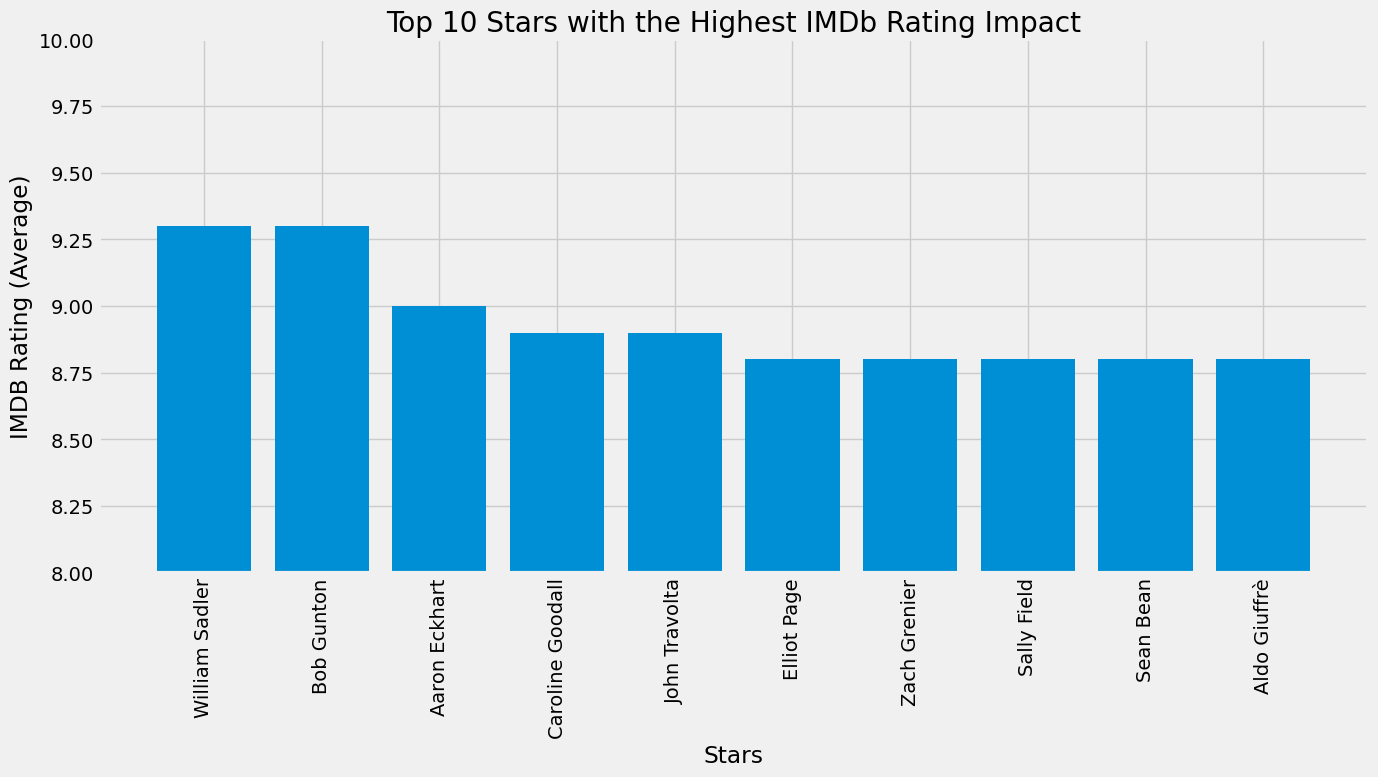

In [59]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))
plt.bar(stars_imdb_rating_impact_average[:10].index,stars_imdb_rating_impact_average[:10])
plt.title("Top 10 Stars with the Highest IMDb Rating Impact")
plt.xlabel("Stars")
plt.ylabel("IMDB Rating (Average)")
plt.xticks(rotation = 90)
plt.ylim(8,10)
plt.tight_layout()

<span style="font-size:20px;"> ✴ Which `stars` have had a greater impact on `Meta Score`? <span>

In [60]:
stars_meta_score_impact_average = total.groupby(total.star).Meta_score.mean().sort_values(ascending=False)
stars_meta_score_impact_average

star
Wendell Corey         100.0
Ellar Coltrane        100.0
Susan Harrison        100.0
Enzo Tarascio         100.0
Barbara Bel Geddes    100.0
                      ...  
Caio Junqueira         33.0
Amy Smart              30.0
J. Mackye Gruber       30.0
Ashton Kutcher         30.0
Melora Walters         30.0
Name: Meta_score, Length: 2709, dtype: float64

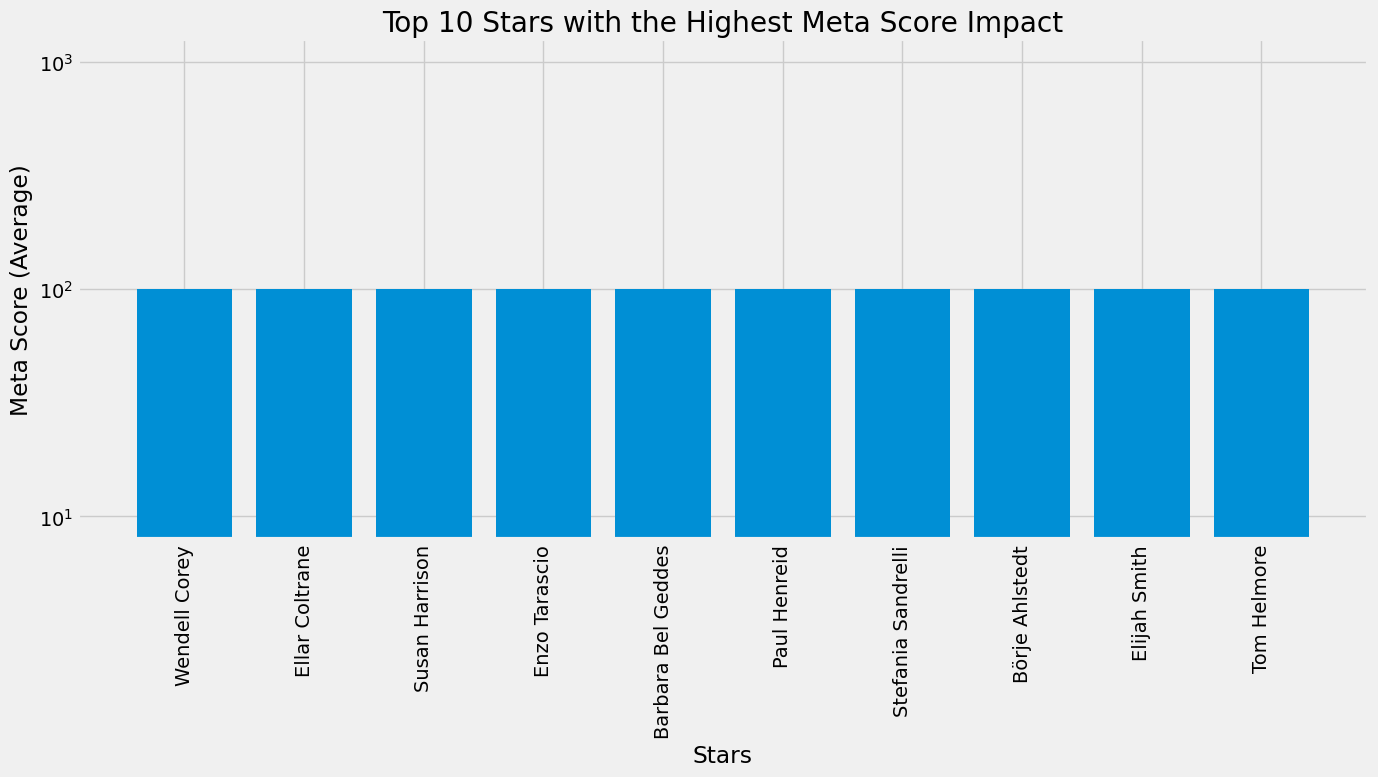

In [61]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))
plt.bar(stars_meta_score_impact_average[:10].index,stars_meta_score_impact_average[:10], log=True)
plt.title("Top 10 Stars with the Highest Meta Score Impact")
plt.xlabel("Stars")
plt.ylabel("Meta Score (Average)")
plt.xticks(rotation = 90)
plt.tight_layout()

<span style="font-size:20px;">🤑 Who generates more money as a star (on average): <span>

In [62]:
stars_gross_impact_average = total.groupby(total.star).Gross.mean().sort_values(ascending=False)
stars_gross_impact_average

star
Daisy Ridley           936662225.0
John Boyega            936662225.0
Michelle Rodriguez     760507625.0
Billy Zane             659325379.0
Huck Milner            608581744.0
                          ...     
Linh Dan Pham               3600.0
Til Schweiger               3296.0
Thierry van Werveke         3296.0
Jan Josef Liefers           3296.0
Nicolas Bro                 1305.0
Name: Gross, Length: 2709, dtype: float64

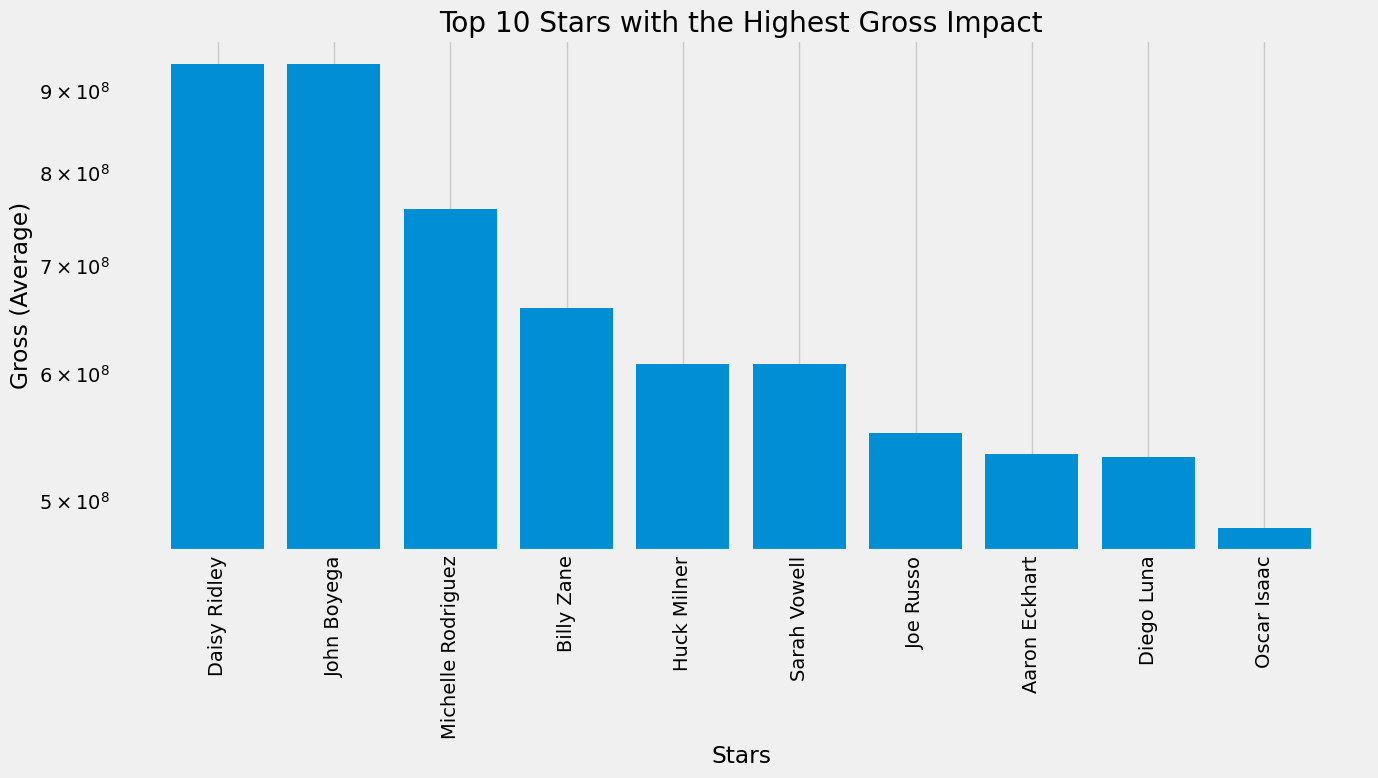

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))
plt.bar(stars_gross_impact_average[:10].index,stars_gross_impact_average[:10], log=True)
plt.title("Top 10 Stars with the Highest Gross Impact")
plt.xlabel("Stars")
plt.ylabel("Gross (Average)")
plt.xticks(rotation = 90)
plt.tight_layout()

<span style="font-size:20px;">❎ Which stars receive a higher average `number of votes` for their movies? <span>

In [64]:
stars_number_of_votes_average = total.groupby(total.star).No_of_Votes.mean().sort_values(ascending=False)
stars_number_of_votes_average

star
Bob Gunton        2343110.0
William Sadler    2343110.0
Aaron Eckhart     2303232.0
Elliot Page       2067042.0
Zach Grenier      1854740.0
                    ...    
Josh O'Connor       25198.0
Alec Secareanu      25198.0
Fengyi Zhang        25088.0
You Ge              25088.0
Leslie Cheung       25088.0
Name: No_of_Votes, Length: 2709, dtype: float64

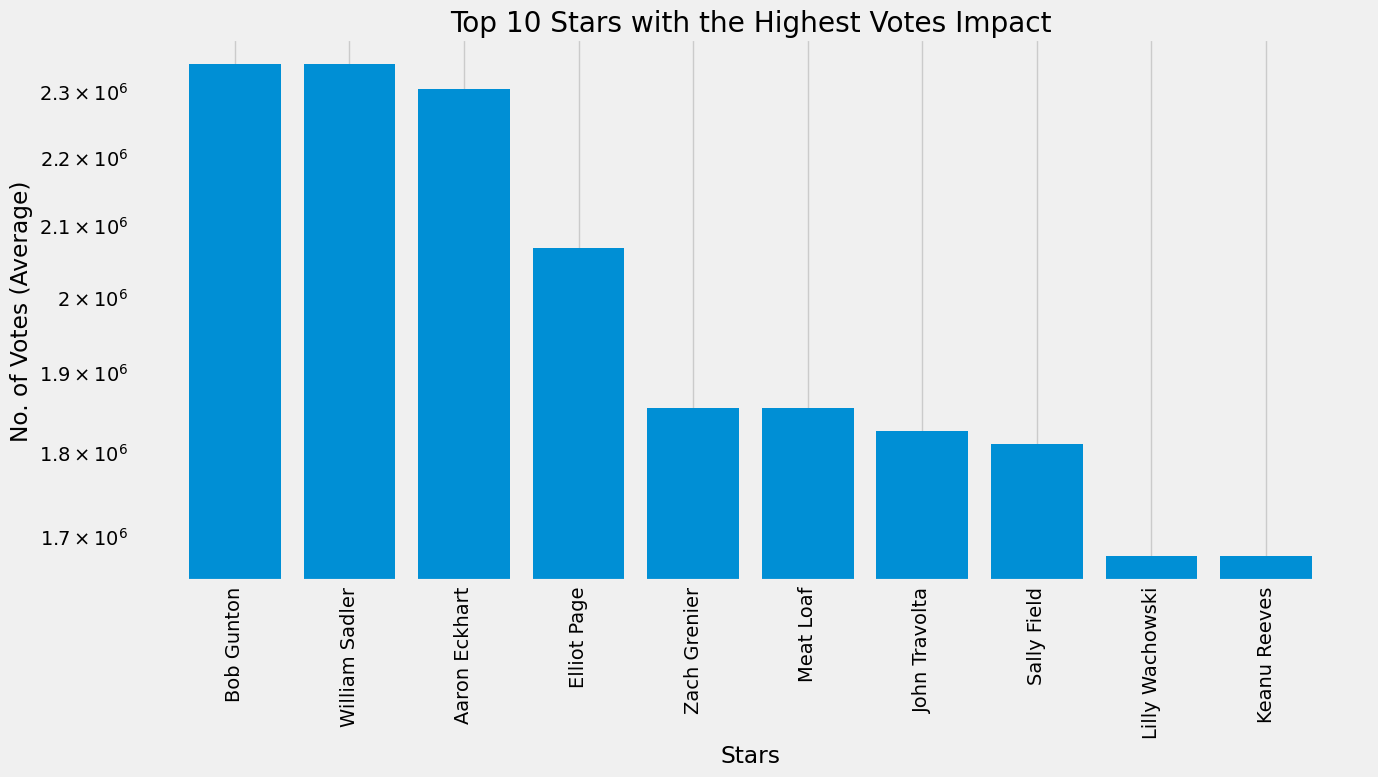

In [65]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))
plt.bar(stars_number_of_votes_average[:10].index,stars_number_of_votes_average[:10], log = True)
plt.title("Top 10 Stars with the Highest Votes Impact")
plt.xlabel("Stars")
plt.ylabel("No. of Votes (Average)")
plt.xticks(rotation = 90)
plt.tight_layout()

<span style="font-size:20px;">👨‍🎤 We're interested in identifying the actors/actresses who have the most appearances in each `genre`: <span>

In [66]:
def extracting_individual_genres(genre_string):
    genres = genre_string.split(',')
    genres_stripped = [genre.strip() for genre in genres]
    return genres_stripped
total.Genre = total.Genre.apply(extracting_individual_genres)
total.Genre

0                          [Drama]
1                   [Crime, Drama]
2           [Action, Crime, Drama]
3                   [Crime, Drama]
4                   [Crime, Drama]
                   ...            
3995      [Comedy, Drama, Romance]
3996              [Drama, Western]
3997         [Drama, Romance, War]
3998                  [Drama, War]
3999    [Crime, Mystery, Thriller]
Name: Genre, Length: 4000, dtype: object

In [67]:
# Exploding the genres into separate rows
total_genres = total.explode('Genre')

In [68]:
total_genres

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,star
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Frank Darabont,2343110,2.834147e+07,Tim Robbins
1,The Godfather,1972,175,Crime,9.2,100.0,Francis Ford Coppola,1620367,1.349664e+08,Marlon Brando
1,The Godfather,1972,175,Drama,9.2,100.0,Francis Ford Coppola,1620367,1.349664e+08,Marlon Brando
2,The Dark Knight,2008,152,Action,9.0,84.0,Christopher Nolan,2303232,5.348584e+08,Christian Bale
2,The Dark Knight,2008,152,Crime,9.0,84.0,Christopher Nolan,2303232,5.348584e+08,Christian Bale
...,...,...,...,...,...,...,...,...,...,...
3998,Lifeboat,1944,97,Drama,7.6,78.0,Alfred Hitchcock,26471,6.803475e+07,William Bendix
3998,Lifeboat,1944,97,War,7.6,78.0,Alfred Hitchcock,26471,6.803475e+07,William Bendix
3999,The 39 Steps,1935,86,Crime,7.6,93.0,Alfred Hitchcock,51853,6.803475e+07,Godfrey Tearle
3999,The 39 Steps,1935,86,Mystery,7.6,93.0,Alfred Hitchcock,51853,6.803475e+07,Godfrey Tearle


<span style="font-size:20px;">🎞 To determine the number of movies each star has appeared in for each genre: <span>

In [69]:
genre_star_counts = total_genres.groupby(['star', 'Genre']).size().reset_index(name="count")
genre_star_counts

,star,Genre,count
0,Aamir Bashir,Action,1
1,Aamir Bashir,Crime,1
2,Aamir Bashir,Drama,1
3,Aamir Khan,Action,2
4,Aamir Khan,Adventure,1
...,...,...,...
8317,Ömer Faruk Sorak,Comedy,1
8318,Ömer Faruk Sorak,Drama,1
8319,Özge Özberk,Adventure,1
8320,Özge Özberk,Comedy,1


In [70]:
max_star_per_genre = genre_star_counts.groupby('Genre')[['Genre','star', 'count']].apply(lambda x: x[x['count'] == x['count'].max()]).reset_index(drop=True)
max_star_per_genre

,Genre,star,count
0,Action,Harrison Ford,8
1,Adventure,Ian McKellen,7
2,Adventure,Tom Hanks,7
3,Animation,Tim Allen,4
4,Animation,Tom Hanks,4
5,Biography,Al Pacino,5
6,Biography,Denzel Washington,5
7,Comedy,Bill Murray,6
8,Comedy,Charles Chaplin,6
9,Crime,Robert De Niro,12


In [71]:
pivot_df = max_star_per_genre.pivot_table(index='Genre', columns='star', values='count', aggfunc='sum', fill_value=0)
pivot_df.head(10)

star,Aamir Khan,Al Pacino,Ben Kingsley,Bill Murray,Boris Karloff,Burt Lancaster,Cary Grant,Charles Chaplin,Chico Marx,Christopher Eccleston,...,Scarlett Johansson,Shah Rukh Khan,Sushant Singh Rajput,Sylvester Stallone,Taika Waititi,Tatsuya Nakadai,Tim Allen,Tom Hanks,Tom Sizemore,William Holden
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4,0,0
Biography,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,6,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***

# <center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >4. Exporting to a PostgreSQL database 💻✈</span></center>

<div class="alert alert-block alert-info" style="font-size:20px;"> 📌   I plan to export my dataset to a PostgreSQL database so that I can easily import it into Power BI. Below is the code I used to connect to my local PostgreSQL database using the psycopg2 library. Please note that this code won't work here since we can't establish a connection to your local database. I'm providing it here to illustrate my approach: </div>

In [72]:
# pip install psycopg2

In [73]:
# import psycopg2
# print("psycopg2 successfully imported!")

In [74]:
# # Connect to the PostgreSQL database
# try:
#     conn = psycopg2.connect(
#         host = 'localhost',
#         dbname = 'imdb',
#         user = 'postgres',
#         password = 'admin',
#         port = 5432
#     )
#     print("Connected to database successfully!")

#     # Create a cursor
#     cur = conn.cursor()

#     # create imdb_table
#     creata_Script = '''
#     CREATE TABLE IF NOT EXISTS imdb_table (
#         id SERIAL PRIMARY KEY,
#         series_title VARCHAR(1000),
#         released_year INT,
#         certificate VARCHAR(100),
#         runtime INT,
#         genre VARCHAR(100),
#         imdb_rating FLOAT,
#         overview TEXT,
#         meta_score FLOAT,
#         director VARCHAR(100),
#         star1 VARCHAR(100),
#         star2 VARCHAR(100),
#         star3 VARCHAR(100),
#         star4 VARCHAR(100),
#         no_of_votes BIGINT,
#         gross FLOAT
#     )
#     '''
#     cur.execute(creata_Script)

#     # Iterate through the dataset and insert each row into the table
#     # iterrows() returns both the index and the data for each row.
#     # While you can certainly write the loop as for row in imdb.iterrows():, you would then
#     # need to access the data using row[1] instead of directly using the variable row, which might be less intuitive.
#     for index, row in imdb.iterrows():
#         insert_query = """
#         INSERT INTO imdb_table (
#             series_title, released_year, certificate, runtime,
#             genre, imdb_rating, overview, meta_score, director,
#             star1, star2, star3, star4, no_of_votes, gross
#         )
#         VALUES (
#         %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
#         );
#         """
#         cur.execute(insert_query, (
#             row["Series_Title"],
#             row["Released_Year"],
#             row["Certificate"],
#             row["Runtime"],
#             row["Genre"],
#             row["IMDB_Rating"],
#             row["Overview"],
#             row["Meta_score"],
#             row["Director"],
#             row["Star1"],
#             row["Star2"],
#             row["Star3"],
#             row["Star4"],
#             row["No_of_Votes"],
#             row["Gross"]
#             ))    
# #     # Execute SQL queries
# #     rows = cur.fetchall()
    
# #     for row in rows:
# #         print(row)

        
#     #commit the queris
#     conn.commit()
    
#     # Close the cursor and connection
#     cur.close()
#     conn.close()
#     print("Connection closed.")

# except psycopg2.Error as e:
#     print("Error:", e)


***
***
***

# <span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >Finaly🏁</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#ff3f3f;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
💜 Thank you for taking the time to look at my analysis of the IMDB 1000 top movies. I acknowledge that there might be some errors or limitations in my approach🙆‍♂️, and I welcome any feedback or suggestions to improve it🙏. You can raech me on <a href="https://www.linkedin.com/in/kourosh-emami">Linkedin</a> if you want to discuss more about this project or share your insights.🧩
</p>
</div>

***
***
***